<a href="https://colab.research.google.com/github/PoojaDoctor/Data144-FinalProject/blob/master/Lily_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Data 144 Final Project Exploration -- Lily Li -- Version 1.1**

### **Ted Main Dataset**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
# Upload the "Ted Main" dataset

url = 'https://raw.githubusercontent.com/PoojaDoctor/Data144-FinalProject/master/datasets/ted_main.csv'
df_ted = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [127]:
df_ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [130]:
df_ted.shape

(2550, 17)

In [131]:
df_ted.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

In [132]:
df_ted.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


In [133]:
# Finding the null values
print(df_ted.isnull().sum())

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64


In [134]:
# Identify the null values rolls
no_speaker_occ = df_ted[df_ted["speaker_occupation"].isnull()]
no_speaker_occ

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
1113,145,"After a crisis, how can we tell if water is sa...",217,TEDGlobal 2011,1310601600,38,Sonaar Luthra,Sonaar Luthra: Meet the Water Canary,1,1326731605,"[{'id': 10, 'name': 'Inspiring', 'count': 73},...","[{'id': 523, 'hero': 'https://pe.tedcdn.com/im...",NaN,"['TED Fellows', 'design', 'global development'...",Meet the Water Canary,https://www.ted.com/talks/sonaar_luthra_meet_t...,353749
1192,122,"The Pirate Party fights for transparency, anon...",1097,TEDxObserver,1331424000,10,Rick Falkvinge,Rick Falkvinge: I am a pirate,1,1333289675,"[{'id': 8, 'name': 'Informative', 'count': 156...","[{'id': 1329, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['Internet', 'TEDx', 'global issues', 'politic...",I am a pirate,https://www.ted.com/talks/rick_falkvinge_i_am_...,181010
1220,257,"As you surf the Web, information is being coll...",399,TED2012,1330473600,32,Gary Kovacs,Gary Kovacs: Tracking our online trackers,1,1336057219,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 9...","[{'id': 1370, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['Internet', 'advertising', 'business', 'priva...",Tracking our online trackers,https://www.ted.com/talks/gary_kovacs_tracking...,2098639
1656,140,"In this lovely talk, TED Fellow Ryan Holladay ...",389,TED@BCG San Francisco,1383091200,33,Ryan Holladay,Ryan Holladay: To hear this music you have to ...,1,1389369735,"[{'id': 1, 'name': 'Beautiful', 'count': 211},...","[{'id': 1152, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['TED Fellows', 'entertainment', 'music', 'tec...",To hear this music you have to be there. Liter...,https://www.ted.com/talks/ryan_holladay_to_hea...,1284510
1911,48,What do you do with an outdated encyclopedia i...,366,TEDYouth 2014,1415059200,34,Brian Dettmer,Brian Dettmer: Old books reborn as art,1,1423238442,"[{'id': 1, 'name': 'Beautiful', 'count': 361},...","[{'id': 610, 'hero': 'https://pe.tedcdn.com/im...",NaN,"['TEDYouth', 'art', 'books', 'creativity']",Old books reborn as art,https://www.ted.com/talks/brian_dettmer_old_bo...,1159937
1949,70,Photographer Boniface Mwangi wanted to protest...,440,TEDGlobal 2014,1413763200,33,Boniface Mwangi,Boniface Mwangi: The day I stood up alone,1,1427989423,"[{'id': 3, 'name': 'Courageous', 'count': 614}...","[{'id': 1757, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['TED Fellows', 'activism', 'art', 'corruption...",The day I stood up alone,https://www.ted.com/talks/boniface_mwangi_boni...,1342431


In [136]:
df_ted['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

In [137]:
no_speaker_occ['views'].describe()

count    6.000000e+00
mean     1.070046e+06
std      7.056541e+05
min      1.810100e+05
25%      5.552960e+05
50%      1.222224e+06
75%      1.327951e+06
max      2.098639e+06
Name: views, dtype: float64

In [0]:
# Finding:
# Becuase the average views for ted talks that speakers' have no occupations is samller than the average views.
# I want to learn more about the relationship between occupations & views.

In [140]:
df_ted['speaker_occupation'].describe()

count       2544
unique      1458
top       Writer
freq          45
Name: speaker_occupation, dtype: object

In [143]:
print('The most popular occupation for speakers is Writer.')
# later, in the graphing area, I will explore more about how different occupations are related to views.

The most popular occupation for speakers is Writer.


In [144]:
# How many unique occupations?
print('NUMBER OF UNIQUE OCCUPATIONS')
print(len(df_ted['speaker_occupation'].unique()))

NUMBER OF UNIQUE OCCUPATIONS
1459


In [147]:
# How many unique speakers?
print('NUMBER OF UNIQUE SPEAKERS')
print(len(df_ted['main_speaker'].unique()))

NUMBER OF UNIQUE SPEAKERS
2156


In [148]:
# How many unique event?
print('NUMBER OF UNIQUE EVENT')
print(len(df_ted['event'].unique()))

NUMBER OF UNIQUE EVENT
355


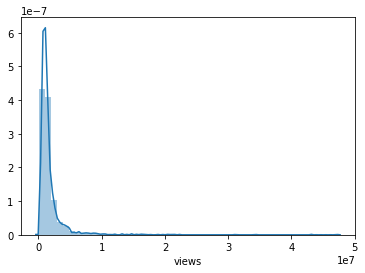

In [149]:
# histogram
# to learn about how do views distribute
sns.distplot(df_ted['views']);

Relationship with numerical variables

scatter plot comments/views

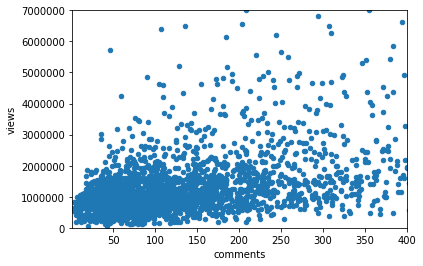

In [153]:
# is the the number of comments related to the popularity?

var = 'comments'
data = pd.concat([df_ted['views'], df_ted[var]], axis=1)
data.plot.scatter(x=var, y='views', xlim=(1,400), ylim=(0,7000000));


scatter plot languages/views

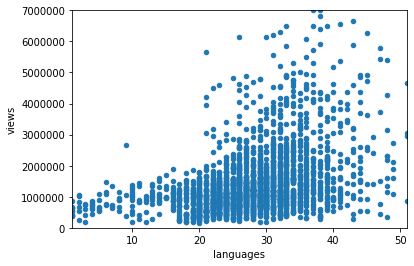

In [154]:
# is the the number of language available related to the popularity?

var = 'languages'
data = pd.concat([df_ted['views'], df_ted[var]], axis=1)
data.plot.scatter(x=var, y='views', xlim=(1,51), ylim=(0,7000000));


scatter plot num_speaker/views

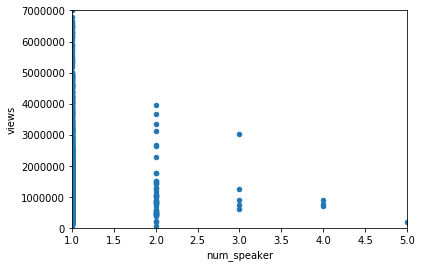

In [156]:
# is the the number of speakers related to the popularity?

var = 'num_speaker'
data = pd.concat([df_ted['views'], df_ted[var]], axis=1)
data.plot.scatter(x=var, y='views', xlim=(1,5), ylim=(0,7000000));


Relationship with categorical features

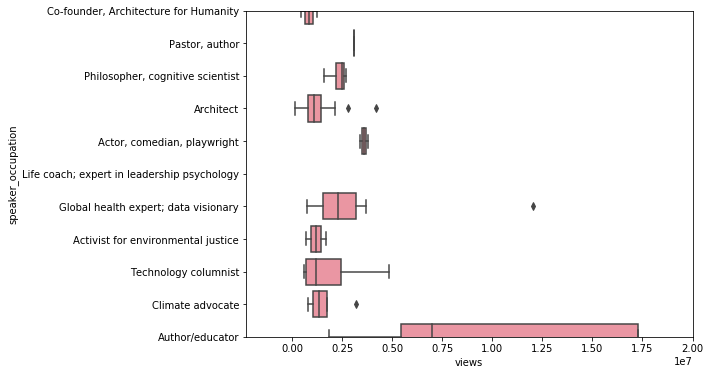

In [157]:
# box plot views/speaker_occupation
# is the the speaker occupation related to the popularity?

var = 'views'
data = pd.concat([df_ted['speaker_occupation'], df_ted[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="speaker_occupation", data=data)
fig.axis(ymin=0, xmax=2e+07, ymax = 10);

In [158]:
no_speaker_occ['views'].describe()

count    6.000000e+00
mean     1.070046e+06
std      7.056541e+05
min      1.810100e+05
25%      5.552960e+05
50%      1.222224e+06
75%      1.327951e+06
max      2.098639e+06
Name: views, dtype: float64

In [159]:
df_ted[df_ted['main_speaker'] == 'Hans Rosling']

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869
117,261,Researcher Hans Rosling uses his cool data too...,1137,TED2007,1172880000,35,Hans Rosling,Hans Rosling: New insights on poverty,1,1182762720,"[{'id': 1, 'name': 'Beautiful', 'count': 218},...","[{'id': 494, 'hero': 'https://pe.tedcdn.com/im...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'economics', 'glo...",New insights on poverty,https://www.ted.com/talks/hans_rosling_reveals...,3243784
447,125,Hans Rosling unveils data visuals that untangl...,602,TED2009,1233878400,40,Hans Rosling,"Hans Rosling: Insights on HIV, in stunning dat...",1,1242197400,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 9...","[{'id': 499, 'hero': 'https://pe.tedcdn.com/im...",Global health expert; data visionary,"['AIDS', 'Africa', 'disease', 'global issues',...","Insights on HIV, in stunning data visuals",https://www.ted.com/talks/hans_rosling_the_tru...,904813
502,122,Talking at the US State Department this summer...,1196,TED@State,1244073600,33,Hans Rosling,Hans Rosling: Let my dataset change your mindset,1,1251334800,"[{'id': 22, 'name': 'Fascinating', 'count': 61...","[{'id': 92, 'hero': 'https://pe.tedcdn.com/ima...",Global health expert; data visionary,"['Africa', 'Asia', 'data', 'global development...",Let my dataset change your mindset,https://www.ted.com/talks/hans_rosling_at_state\n,1471039
558,276,Hans Rosling was a young guest student in Indi...,950,TEDIndia 2009,1257292800,36,Hans Rosling,Hans Rosling: Asia's rise -- how and when,1,1258938000,"[{'id': 22, 'name': 'Fascinating', 'count': 77...","[{'id': 92, 'hero': 'https://pe.tedcdn.com/ima...",Global health expert; data visionary,"['Asia', 'economics', 'health', 'india', 'stat...",Asia's rise -- how and when,https://www.ted.com/talks/hans_rosling_asia_s_...,1738069
726,607,The world's population will grow to 9 billion ...,604,TED@Cannes,1277078400,46,Hans Rosling,"Hans Rosling: Global population growth, box by...",1,1278663300,"[{'id': 22, 'name': 'Fascinating', 'count': 76...","[{'id': 695, 'hero': 'https://pe.tedcdn.com/im...",Global health expert; data visionary,"['culture', 'data', 'demo', 'global issues', '...","Global population growth, box by box",https://www.ted.com/talks/hans_rosling_on_glob...,2934262
784,342,Hans Rosling reframes 10 years of UN data with...,934,TEDxChange,1284940800,33,Hans Rosling,Hans Rosling: The good news of the decade? We'...,1,1286442720,"[{'id': 8, 'name': 'Informative', 'count': 554...","[{'id': 540, 'hero': 'https://pe.tedcdn.com/im...",Global health expert; data visionary,"['Africa', 'TEDx', 'data', 'global development...",The good news of the decade? We're winning the...,https://www.ted.com/talks/hans_rosling_the_goo...,738895
893,268,What was the greatest invention of the industr...,555,TEDWomen 2010,1291420800,46,Hans Rosling,Hans Rosling: The magic washing machine,1,1300714380,"[{'id': 9, 'name': 'Ingenious', 'count': 457},...","[{'id': 620, 'hero': 'https://pe.tedcdn.com/im...",Global health expert; data visionary,"['culture', 'data', 'economics', 'women']",The magic washing machine,https://www.ted.com/talks/hans_rosling_and_the...,2391977
1239,491,Hans Rosling had a question: Do some religions...,800,TEDxSummit,1334534400,36,Hans Rosling,Hans Rosling: Religions and babies,1,1337698856,"[{'id': 22, 'name': 'Fascinating', 'count': 86...","[{'id': 1418, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary

In [0]:
# discovering patterns from the most popular speaker, Hans Rosling

In [161]:
df_ted.groupby('event').sum()

,comments,duration,film_date,languages,num_speaker,published_date,views
event,,,,,,,
AORN Congress,87,510,1237024800,0,1,1263027540,149818
Arbejdsglaede Live,258,1092,1241481600,22,1,1267802040,971594
BBC TV,146,3955,426531600,0,1,1267631820,521974
Bowery Poetry Club,177,182,1131805080,0,1,1264252560,676741
Business Innovation Factory,264,3317,3765052800,49,3,3832642740,912258
...,...,...,...,...,...,...,...
The Do Lectures,40,1690,1253232000,0,1,1285488000,112321
Toronto Youth Corps,373,262,74649600,0,1,1273847820,1028630
University of California,121,8829,2087596800,0,2,2532243480,523663


In [162]:
df_ted['event'].describe()

count        2550
unique        355
top       TED2014
freq           84
Name: event, dtype: object

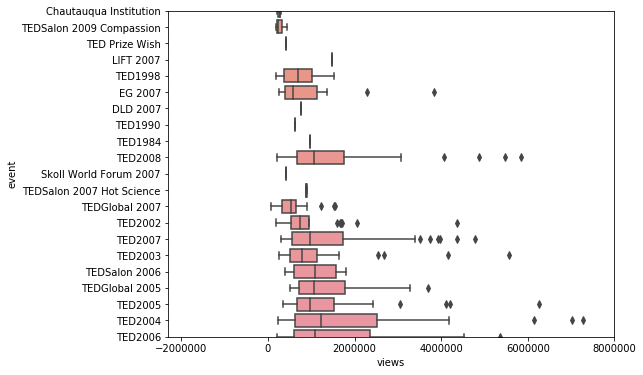

In [163]:
# box plot views/speaker_occupation
var = 'views'
data = pd.concat([df_ted['event'], df_ted[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="event", data=data)
fig.axis(ymin=0, xmax=8000000, ymax = 20);

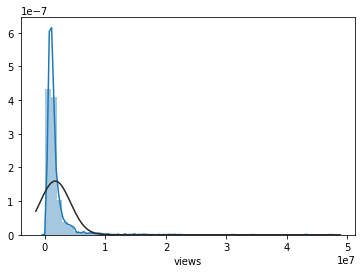

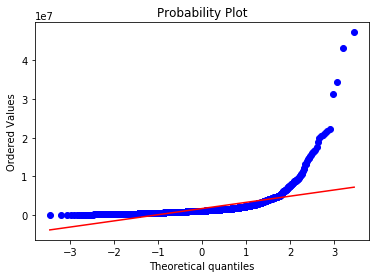

In [164]:
#histogram and normal probability plot
sns.distplot(df_ted['views'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_ted['views'], plot=plt)

In [0]:
# Upload the "Transcript" dataset

url = 'https://raw.githubusercontent.com/PoojaDoctor/Data144-FinalProject/master/datasets/transcripts.csv'
df_trans = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [166]:
df_trans.head(3)

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
